Based on the process to get grids identified in notebooks 5 and 6.

I already have created the npy images. I now need to read them in to create the train/test/validate datasets.



In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [34]:
labelsDataDir = 'C:\\Users\\JOSA\\Documents\\repos\\allImgsLabelledDB\\'
npyDataDir = 'C:\\Users\\JOSA\\Documents\\repos\\npyData\\'

allNpys = []
for file in os.listdir(npyDataDir):
    if file.endswith(".npy"):
        allNpys.append(file)


In [40]:
######################
import random
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive
from IPython.display import display,clear_output    
    
%matplotlib inline

# To prevent automatic figure display when execution of the cell ends
%config InlineBackend.close_figures=False 


plt.ioff()
ax=plt.gca()

out=widgets.Output()
button=widgets.Button(description='Show random square')
vbox=widgets.VBox(children=(out,button))
display(vbox)

def click(b):
    ax.clear()
    #get the name of the image and the squareIdx, needed to retrived the label from the labelled dataset
    testIdx = 0
    while testIdx == 0:
        pickImg = random.choice(allNpys)
        imgName = pickImg.split('_')[0] # + '.npy' for the data, # + '.dat' for the labels
        squareIdx = int(pickImg.split('_')[1].split('.')[0])
        # #read the dat
        #labels = np.loadtxt(os.path.join(labelsDataDir, imgName + '.dat' ))
        allLabels = []
        with open(os.path.join(labelsDataDir, imgName + '.dat' )) as f:
            allLabels.append([line.split()[0:9] for line in f])

        allLabels = allLabels[0][2:11]
        allLabels2 = []
        for i in range(0, 9):
            allLabels2 = allLabels2 + list(map(int, allLabels[i]))
    
        testIdx = allLabels2[squareIdx]
    # check labels    
    ax.imshow(np.load(os.path.join(npyDataDir, pickImg)), cmap=plt.cm.gray)
    ax.set_axis_off()
    ax.set_title(pickImg + ', ' + str(allLabels2[squareIdx]))
        
    with out:
        clear_output(wait=True)
        display(ax.figure)

button.on_click(click)
click(None)

Now we know we can correctly read in images and get the label. We now need to create the train datasets

In [86]:
x_labels = []
for i in range(0, len(allNpys)):
    pickImg = allNpys[i]
    imgName = pickImg.split('_')[0] # + '.npy' for the data, # + '.dat' for the labels
    squareIdx = int(pickImg.split('_')[1].split('.')[0])
    if os.path.isfile(os.path.join(labelsDataDir, imgName + '.dat' )):
        # #read the dat
        #labels = np.loadtxt(os.path.join(labelsDataDir, imgName + '.dat' ))
        allLabels = []
        with open(os.path.join(labelsDataDir, imgName + '.dat' )) as f:
            allLabels.append([line.split()[0:9] for line in f])

        allLabels = allLabels[0][2:11]
        allLabels2 = []
        for ii in range(0, 9):
            allLabels2 = allLabels2 + list(map(int, allLabels[ii]))
    
        x_labels.append(allLabels2[squareIdx])
        thisImg = np.load(os.path.join(npyDataDir, pickImg))
        if i == 0:
            x_train = thisImg
        else:
            x_train = np.dstack((x_train, thisImg))
                      


In [87]:
from sklearn.model_selection import train_test_split
#prepare datasets
x_train = np.transpose(x_train, (2, 0, 1))  
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],
                                            x_train.shape[2], 1)
y_train = np.array(x_labels)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
# create testtrain/validate
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=1234)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.1, random_state = 1234)
input_shape = (30, 30, 1)

Epoch 1/10
13056/13056 [==============================] - 11s 837us/step - loss: 1.4659 - accuracy: 0.6393
Epoch 2/10
13056/13056 [==============================] - 11s 822us/step - loss: 1.1889 - accuracy: 0.6449
Epoch 3/10
13056/13056 [==============================] - 11s 824us/step - loss: 0.9094 - accuracy: 0.6761
Epoch 4/10
13056/13056 [==============================] - 11s 818us/step - loss: 0.8442 - accuracy: 0.6940
Epoch 5/10
13056/13056 [==============================] - 11s 824us/step - loss: 0.8079 - accuracy: 0.7040
Epoch 6/10
13056/13056 [==============================] - 11s 828us/step - loss: 0.7830 - accuracy: 0.7115
Epoch 7/10
13056/13056 [==============================] - 11s 814us/step - loss: 0.7563 - accuracy: 0.7263
Epoch 8/10
13056/13056 [==============================] - 11s 825us/step - loss: 0.7283 - accuracy: 0.7417
Epoch 9/10
13056/13056 [==============================] - 11s 816us/step - loss: 0.6953 - accuracy: 0.7559
Epoch 10/10
1612/1612 [==============

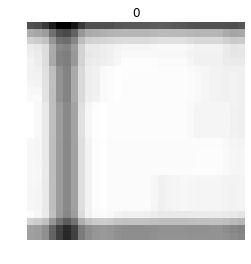

In [88]:
# train model
import tensorflow as tf
import keras
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(30, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)



model.evaluate(x_test, y_test)




In [91]:
%matplotlib inline

# To prevent automatic figure display when execution of the cell ends
%config InlineBackend.close_figures=False 


plt.ioff()
ax=plt.gca()

out=widgets.Output()
button=widgets.Button(description='Show random square')
vbox=widgets.VBox(children=(out,button))
display(vbox)

def click(b):
    ax.clear()
    image_index = random.choice(range(0, x_test.shape[0]))
    #get the name of the image and the squareIdx, needed to retrived the label from the labelled dataset
    pred = model.predict(x_test[image_index].reshape(1, x_test[image_index].shape[0], x_test[image_index].shape[1], 1))
    
    # check labels    
    ax.imshow(x_test[image_index].reshape(30, 30), cmap=plt.cm.gray)
    ax.set_axis_off()
    ax.set_title(str(pred.argmax()))
        
    with out:
        clear_output(wait=True)
        display(ax.figure)

button.on_click(click)
click(None)